In [1]:
import espaloma as esp
from rdkit import Chem
from openeye import oechem

In [2]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [3]:
HYBRIDIZATION_RDKIT = {
    Chem.rdchem.HybridizationType.SP: [1, 0, 0, 0, 0],
    Chem.rdchem.HybridizationType.SP2: [0, 1, 0, 0, 0],
    Chem.rdchem.HybridizationType.SP3: [0, 0, 1, 0, 0],
    Chem.rdchem.HybridizationType.SP3D: [0, 0, 0, 1, 0],
    Chem.rdchem.HybridizationType.SP3D2: [0, 0, 0, 0, 1],
    Chem.rdchem.HybridizationType.S: [0, 0, 0, 0, 0],
    Chem.rdchem.HybridizationType.UNSPECIFIED: [0, 0, 0, 0, 0],
    Chem.rdchem.HybridizationType.OTHER: [0, 0, 0, 0, 0],
}

HYBRIDIZATION_OE = {
    oechem.OEHybridization_sp: [1, 0, 0, 0, 0],
    oechem.OEHybridization_sp2: [0, 1, 0, 0, 0], 
    oechem.OEHybridization_sp3: [0, 0, 1, 0, 0],
    oechem.OEHybridization_sp3d: [0, 0, 0, 1, 0],
    oechem.OEHybridization_sp3d2: [0, 0, 0, 0, 1],
    oechem.OEHybridization_Unknown: [0, 0, 0, 0, 0],
}

In [4]:
#smi = 'C1=CC=C(C=C1)C(=N)N'
smi = 'C1=CC=C(C=C1)C(=[NH2+])N'

mol = Chem.MolFromSmiles(smi)
mol = Chem.AddHs(mol)

rdmol = mol

_smi = Chem.MolToSmiles(rdmol)
print(_smi)
oemol = oechem.OEGraphMol()
oechem.OESmilesToMol(oemol, _smi)

[H]c1c([H])c([H])c(C(N([H])[H])=[N+]([H])[H])c([H])c1[H]


True

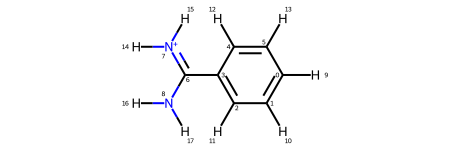

In [5]:
rdmol

#### rdkit

In [6]:
for atom in rdmol.GetAtoms():
    print(
        atom.GetIdx(),
        atom.GetAtomicNum(),
        atom.GetDegree(),
        atom.GetIsAromatic() * 1.0,
        atom.IsInRingSize(3) * 1.0,
        atom.IsInRingSize(4) * 1.0,
        atom.IsInRingSize(5) * 1.0,
        atom.IsInRingSize(6) * 1.0,
        atom.IsInRingSize(7) * 1.0,
        atom.IsInRingSize(8) * 1.0,
        HYBRIDIZATION_RDKIT[atom.GetHybridization()],
    )

0 6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
1 6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
2 6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
3 6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
4 6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
5 6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
6 6 3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 1, 0, 0, 0]
7 7 3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 1, 0, 0, 0]
8 7 3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 1, 0, 0, 0]
9 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
10 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
11 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
12 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
13 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
14 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
15 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
16 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
17 1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]


In [7]:
atom.IsInRingSize(2)

False

#### openeye

In [8]:
# openeye
oechem.OEAssignHybridization(oemol)
for atom in oemol.GetAtoms():
    print(
        #atom.GetIdx(),
        atom.GetAtomicNum(),
        atom.GetDegree(),
        atom.IsAromatic() * 1.0,
        oechem.OEAtomIsInRingSize(atom, 3) * 1.0,
        oechem.OEAtomIsInRingSize(atom, 4) * 1.0,
        oechem.OEAtomIsInRingSize(atom, 5) * 1.0,
        oechem.OEAtomIsInRingSize(atom, 6) * 1.0,
        oechem.OEAtomIsInRingSize(atom, 7) * 1.0,
        oechem.OEAtomIsInRingSize(atom, 8) * 1.0,
        HYBRIDIZATION_OE[atom.GetHyb()],
    )

1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
6 3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 1, 0, 0, 0]
7 3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 1, 0, 0, 0]
1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
7 3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 1, 0, 0, 0]
1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]
6 3 1.0 0.0 0.0 0.0 1.0 0.0 0.0 [0, 1, 0, 0, 0]
1 1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 [0, 0, 0, 0, 0]


#### dgl

In [9]:
from functools import partial

In [10]:
from dgllife.utils.featurizers import (
    BaseAtomFeaturizer,
    ConcatFeaturizer,
    atom_type_one_hot,
    atom_degree_one_hot,
    atom_hybridization_one_hot,
    atom_is_aromatic,
    atom_total_num_H_one_hot,
    atomic_number,
    atom_degree,
    atom_is_in_ring_one_hot,
    one_hot_encoding
)

In [11]:
def atom_is_in_ringsize_one_hot(atom):
    """One hot encoding ring size.
    """
    return atom.IsInRingSize(3), atom.IsInRingSize(4), atom.IsInRingSize(5), atom.IsInRingSize(6), atom.IsInRingSize(7), atom.IsInRingSize(8)

In [12]:
class AtomFeaturizer(BaseAtomFeaturizer):
    def __init__(self, atom_data_field='h'):
        super().__init__(
            featurizer_funcs={atom_data_field: ConcatFeaturizer(
                [atomic_number,  # this is to clafiry atomic number. not for production.
                 atom_type_one_hot,
                 atom_degree_one_hot,
                 atom_is_aromatic,
                 atom_is_in_ringsize_one_hot,
                 atom_hybridization_one_hot,
                ]
            )})

In [13]:
node_featurizer=AtomFeaturizer("h0")

In [14]:
node_featurizer.feat_size()

67

In [15]:
f = node_featurizer(rdmol)

In [16]:
f['h0'].numpy()

array([[6., 1., 0., ..., 0., 0., 0.],
       [6., 1., 0., ..., 0., 0., 0.],
       [6., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
# first nitrogen
f['h0'].numpy()[7]

array([7., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [21]:
# second nitrogen
f['h0'].numpy()[8]

array([7., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [22]:
assert f['h0'].numpy()[7].flatten().all() == f['h0'].numpy()[8].flatten().all()